# Dimensionality reduction
 In statistics, machine learning, and information theory, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It can be divided into feature selection and feature extraction
 - feature selection approaches to try the find a subset of the original variables. These are three strategies: the filter strategy (eg information gain ), the wrapper strategy (eg. search guided by accuracy) and the embedded strategy (features are selected to add or to be removed while building the model based on the prediction errors)
 
 Why Dimensionality reduction?
 In terms of performance, having data of high dimensionality is problematic because (a) it can mean high computational cost to perform learning and inference and (b) it often leads to overfitting 
 


# Principal component analysis (PCA)
 It is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.



In [1]:
import numpy as np

# import sklearn stuff
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# set up for plotting as interactive figures in the notebook
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# Initial Data setup 

# load the iris dataset
iris = datasets.load_iris()


In [4]:
# note that the iris data is 4-dimensional
iris.data.shape

(150L, 4L)

In [5]:
# let's look at the first 10 elements
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Here we are using PCA to reduce the dimension of iris dataset to 2

In [6]:
# set up a PCA learner
pca = PCA(n_components = 2)
# actually run the fit algorithm
eigenbasis = pca.fit(iris.data)
# transform our data using the learned transform
iris2d = eigenbasis.transform(iris.data)

In [7]:
# note that our transformed dat is now 2-dimensional
iris2d.shape

(150L, 2L)

In [8]:
# again, let's look at the first 10 elements; note that they are 2 dimensional, rather than 4
iris2d[:10]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ]])

In [9]:
# the actual components
print("principal components:\n", pca.components_)
# let's also look at how much of the total variance we were able to cover with 2 dimensions
print('percentage of variance explained by first 2 principal components:', pca.explained_variance_ratio_)

('principal components:\n', array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]]))
('percentage of variance explained by first 2 principal components:', array([0.92461621, 0.05301557]))


<IPython.core.display.Javascript object>


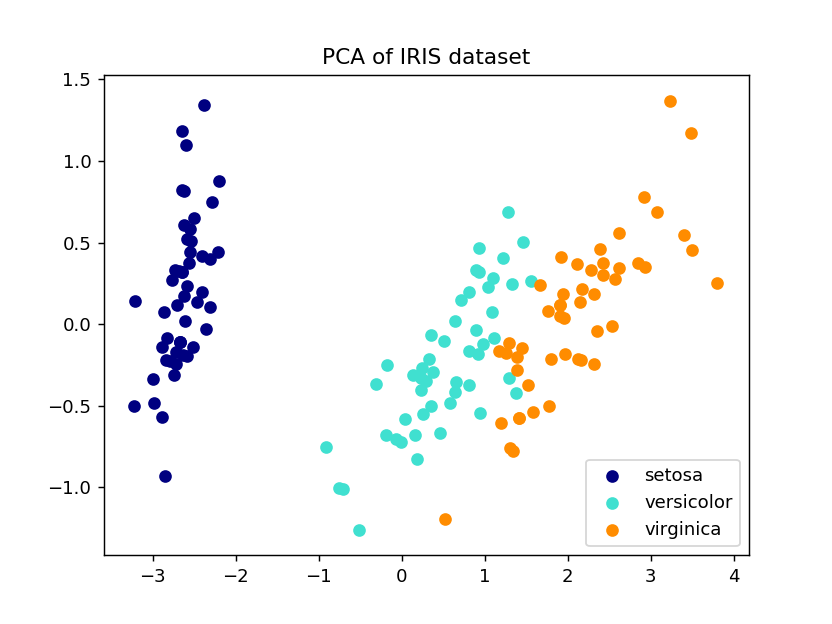

Text(0.5,1,'PCA of IRIS dataset')

In [10]:
# make a new figure
plt.figure()
# pick some colors to use
colors = ['navy', 'turquoise', 'darkorange']

# plot our points with colors and labels
for color, i, iris.target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(iris2d[iris.target == i, 0], iris2d[iris.target == i, 1], color=color, label=iris.target_name)
plt.legend(loc='best')
plt.title('PCA of IRIS dataset')

AS we can see in above graph that after reducing dimension of iris dataset from 4 to 2, if we plot the scatter plot with dataset and actual target(iris.target_name: this is basically class of the iris) we can easily differentiate one class from other.
This will be clear in below experiment when I will apply clustering algortihm on the same dataset.

# Clustering
Let's try running the k-means clustering algorithm on our data, and then plotting the results to see how it looks

In [11]:
#initialzing K-Means algorithm
kmeans=KMeans(n_clusters=3,random_state=101)

In [13]:
#fitting kmeans to our features data
kmeans.fit(iris2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

In [14]:
#getting cluster labels
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<IPython.core.display.Javascript object>


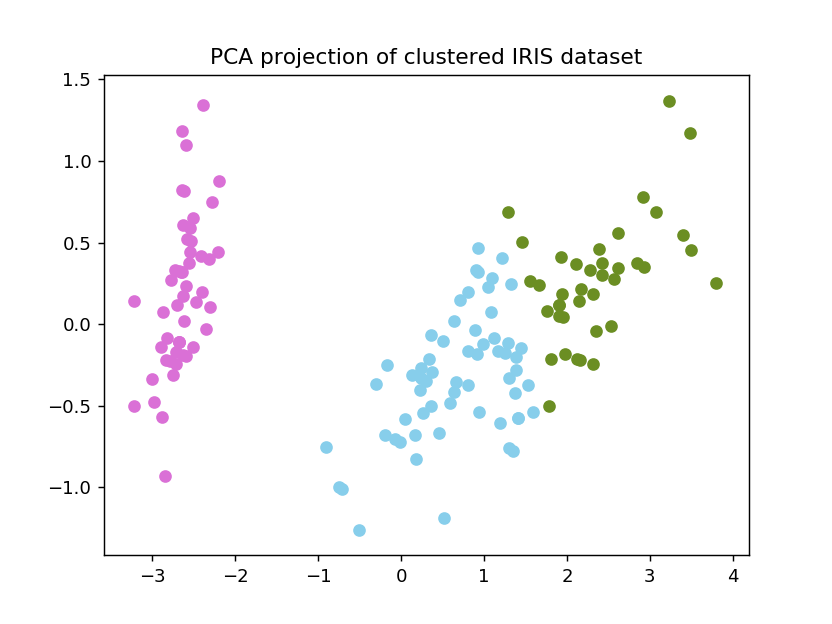

<IPython.core.display.Javascript object>


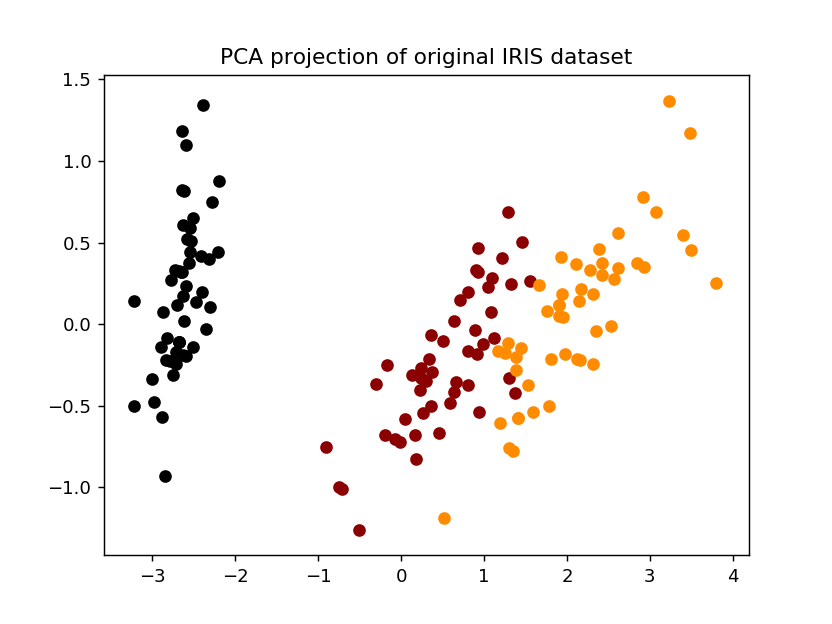

Text(0.5,1,'PCA projection of original IRIS dataset')

In [16]:
# now let's plot our data using cluster assignment rather than "true" class label.
# we'll use the PCA projection for visualization purposes, even though we did our
# clustering in the original 4-dimensional data space
plt.figure()
colors = ['skyblue', 'orchid', 'olivedrab']

for i in range(len(iris2d)):
    plt.scatter(iris2d[i][0], iris2d[i][1], color=colors[kmeans.labels_[i]])
plt.title('PCA projection of clustered IRIS dataset')

    
# sice we do have real class labels, we might also want to plot those,
# so we can see how well the clustering matches up with the real labels
plt.figure()
colors2 = ['black', 'darkred', 'darkorange']

for i in range(len(iris2d)):
    plt.scatter(iris2d[i][0], iris2d[i][1], color=colors2[iris.target[i]])

plt.title('PCA projection of original IRIS dataset')

We can clearly evident from the above plot that after plotting scatter plot of PCA projection of clustered IRIS data set and PCA projection of original IRIS dataset, they both look preety much similar, moreover we can easily differentiate one cluster to other in clusterd plot. It means that after applying PCA on original IRIS dataset we didn't lose the information and we only got the important information which is needed.

# Bibliography

1.https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/

2.https://en.wikipedia.org/wiki/Dimensionality_reduction

3.https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka

4.https://en.wikipedia.org/wiki/Principal_component_analysis

5.https://towardsdatascience.com/reducing-dimensionality-from-dimensionality-reduction-techniques-f658aec24dfe